In [1]:
from api_keys import gkey
import numpy as np
import pandas as pd
import requests
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [3]:
total_energy_df = pd.DataFrame({})

In [4]:
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.TETCB.{state}.A')
    response=requests.get(url)
    total_states = response.json()
    total_data = dict(total_states['series'][0]['data'][0:11])
    total_energy_df[state]= total_data.values()
total_energy_df

,AL,AK,AZ,AR,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,1954823,609786,1487797,1119701,7966578,1513286,753010,174515,290283,4281336,...,396837,2255868,14258824,835121,139153,2401238,2078665,832914,1885868,558594
1,1901160,609681,1474130,1057879,7889218,1463470,726346,166869,270503,4211840,...,384986,2167105,13424141,829148,134598,2302335,2098406,752851,1805871,537178
2,1929369,607570,1473592,1054563,7825522,1453287,724428,174223,273776,4227859,...,382983,2209517,13164829,812753,135650,2332102,2073986,761973,1793847,506363
3,1923945,623778,1442275,1062299,7671759,1490547,756548,178216,277857,4245922,...,385859,2180072,12937563,803446,140924,2374507,2010043,768613,1810006,507953
4,1970386,605257,1420260,1121936,7584901,1482820,752241,179278,274337,4096281,...,393981,2205501,12789688,800078,140498,2435979,2021490,781210,1887219,537553
5,1933626,618287,1411465,1104533,7650033,1468231,749002,174798,274254,4058797,...,390343,2137773,12785527,833312,137698,2416930,2045739,751371,1828731,540265
6,1890289,651177,1394326,1072816,7547035,1441627,725868,172778,273665,4014683,...,376640,2085631,11999994,791539,129759,2348356,2047699,730734,1733338,551167
7,1916766,655820,1424223,1129160,7768811,1472721,740999,183642,272754,4129153,...,378973,2200769,11937899,795887,151927,2387551,2069382,738120,1792975,558021
8,1942050,655575,1383797,1126955,7760747,1515541,767314,190374,250338,4277455,...,379016,2251575,11728654,757800,156046,2491854,2042332,751360,1808485,541756
9,1800096,639557,1380048,1041617,7774769,1465463,766459,186485,259458,4115274,...,363091,2087484,10884447,742250,156687,2429455,2031912,706207,1764012,524122


In [5]:
total_energy_df=total_energy_df.transpose()

In [6]:
total_energy_df = total_energy_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

In [7]:
total_energy_df = total_energy_df[total_energy_df.columns[::-1]]

In [8]:
total_energy_df2 = total_energy_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [9]:
consumption_data_path= "../State Solar Production Data by Year/RenewableConsumption.csv"
consumption_state_df = pd.read_csv(consumption_data_path)
consumption_state_df=consumption_state_df.rename(columns={"Unnamed: 0":"State"})
consumption_state_df = consumption_state_df.set_index("State")

In [10]:
consumption_state_df2= consumption_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [11]:
percent_df = (consumption_state_df/total_energy_df)*100

In [12]:
target_percent_df=percent_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [13]:
target_percent_df.to_csv("percentconsumption.csv")

In [14]:
target_percent_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
AL,11.875106,15.243187,13.704076,14.606478,14.070018,17.421259,14.915808,14.782907,13.451652,14.808748
AK,2.017832,2.487972,2.615719,2.546735,2.738272,3.061847,3.760717,3.819949,4.316540,4.008326
AZ,7.641605,6.976134,7.323618,9.112337,8.244987,8.477716,9.842071,10.343797,11.014718,11.649990
AR,11.376857,12.565751,12.300846,11.967746,11.686906,11.984160,11.732131,12.169926,12.120471,11.366801
CA,8.429909,9.339480,10.791461,12.200220,10.752766,11.234396,11.404302,11.255268,13.553179,15.859569
CO,5.200950,5.345068,5.400316,7.265667,7.442841,8.306935,8.809566,8.897941,10.869429,10.985193
CT,4.707228,5.438125,5.674861,5.853989,5.372464,5.733363,6.045137,6.181895,6.604383,6.522511
DC,0.306892,0.332466,0.589891,0.713344,0.633182,0.672204,0.732382,1.027405,1.258732,1.352558
DE,1.985901,2.559181,3.097812,2.882451,2.609029,2.774800,2.939450,2.787405,2.773800,2.924921


In [15]:
texas = consumption_state_df2.iloc[43].mean()
washington = consumption_state_df2.iloc[47].mean()
ohio = consumption_state_df2.iloc[35].mean()
pennsylvania = consumption_state_df2.iloc[38].mean()
vermont = consumption_state_df2.iloc[45].mean()

In [16]:
texas_total = (total_energy_df2.iloc[43].mean())-texas
texas_list=[texas_total, texas]
washington_total = (total_energy_df2.iloc[47].mean())-washington
washington_list=[washington_total, washington]
ohio_total = (total_energy_df2.iloc[35].mean())-ohio
ohio_list=[ohio_total, ohio]
pennsylvania_total = (total_energy_df2.iloc[38].mean())-pennsylvania
pennsylvania_list=[pennsylvania_total, pennsylvania]
vermont_total = (total_energy_df2.iloc[45].mean())-vermont
vermont_list=[vermont_total, vermont]
explode = (0.1, 0)
labels = ["Other Energy", "Renewable Energy"]

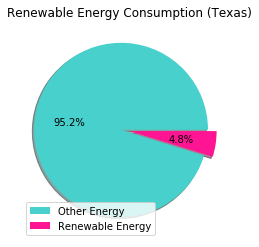

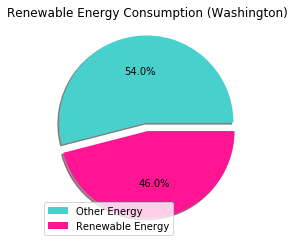

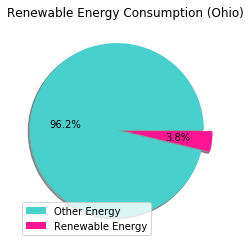

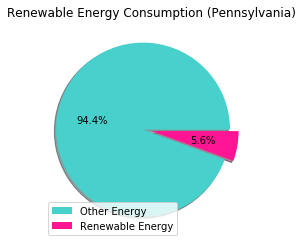

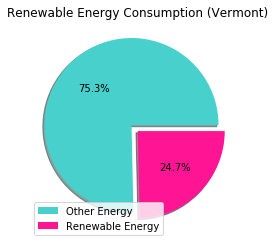

In [17]:
plt.pie(texas_list, colors = ["mediumturquoise", "deeppink"], autopct="%1.1f%%", explode=explode, shadow=True)
plt.legend(labels, loc="lower left")
plt.title("Renewable Energy Consumption (Texas)")
plt.savefig("texaspie.png")
plt.show()
plt.pie(washington_list, colors = ["mediumturquoise", "deeppink"], autopct="%1.1f%%", explode=explode, shadow=True)
plt.legend(labels, loc="lower left")
plt.title("Renewable Energy Consumption (Washington)")
plt.savefig("washingtonpie.png")
plt.show()
plt.pie(ohio_list, colors = ["mediumturquoise", "deeppink"], autopct="%1.1f%%", explode=explode, shadow=True)
plt.legend(labels, loc="lower left")
plt.title("Renewable Energy Consumption (Ohio)")
plt.savefig("ohiopie.png")
plt.show()
plt.pie(pennsylvania_list, colors = ["mediumturquoise", "deeppink"], autopct="%1.1f%%", explode=explode, shadow=True)
plt.legend(labels, loc="lower left")
plt.title("Renewable Energy Consumption (Pennsylvania)")
plt.savefig("pennpie.png")
plt.show()
plt.pie(vermont_list, colors = ["mediumturquoise", "deeppink"], autopct="%1.1f%%", explode=explode, shadow=True)
plt.legend(labels, loc="lower left")
plt.title("Renewable Energy Consumption (Vermont)")
plt.savefig("vermontpie.png")
plt.show()